# Deep Learning

## Part 1: Image Classification - Fashion MNIST (MLP)

---
> Kostis Konstantinos (p3352311) <br>
> Karousis Nikolaos (p3352321) <br>
> MSc Data Science (Part-Time) <br>
> Athens University Of Economics and Business

In [1]:
# Install needed libraries
!pip install tensorflow==2.12.0 keras-tuner==1.4.7 pandas==1.5.3 numpy==1.23.5 scikit-learn==1.3.0 matplotlib==3.8.4

In [2]:
## Allow access to the code directory
import sys
import os
from google.colab import drive

# Mount the drive
drive.mount('/content/drive', force_remount=True)

# Define the base path
base_path = '/content/drive/MyDrive/deep-learning-msc-data-science-2024-2025'

# Define the code path
code_folder = os.path.join(base_path, 'code')

# Add the 'code' folder to the sys.path
sys.path.append(code_folder)

Mounted at /content/drive


In [3]:
# Load necessary libs and modules
from constants import *
from fashion_mnist_downloader import FashionMNISTDownloader
from fashion_mnist_loader import FashionMNISTLoader
from mlp import MLPTuner, MLP

## Multi Layer Perceptron (section)

### Download the data (if needed)

In [4]:
fashion_mnist_path = os.path.join(base_path, FASHION_MNIST_DATA_PATH)

In [5]:
fashion_mnist_downloader = FashionMNISTDownloader(fashion_mnist_path)
fashion_mnist_downloader.download()

### Load the data

In [6]:
train_loader = FashionMNISTLoader(fashion_mnist_path, 'train')
train_set, validation_set = train_loader.load_data(validation_size=0.1)
train_X, train_y = train_set
validation_X, validation_y = validation_set

test_loader = FashionMNISTLoader(fashion_mnist_path, 't10k')
test_X, test_y = test_loader.load_data()
test_set = (test_X, test_y)

### Inspect dataset splits

In [7]:
print('Train Images: {}'.format(train_X.shape))
print('Train Labels: {}'.format(train_y.shape))
print('Validation Images: {}'.format(validation_X.shape))
print('Validation Labels: {}'.format(validation_y.shape))
print('Test Images: {}'.format(test_X.shape))
print('Test Labels: {}'.format(test_y.shape))

Train Images: (54000, 784)
Train Labels: (54000, 10)
Validation Images: (6000, 784)
Validation Labels: (6000, 10)
Test Images: (10000, 784)
Test Labels: (10000, 10)


### MLP Hyper-Parameter tuning

In [8]:
tuner_directory = os.path.join(base_path, TUNERS_DIR)
fashion_mlp_tuner = MLPTuner(train_set, validation_set,
                             tuner_directory, FASHION_MNIST_MLP_TUNER_PROJECT_NAME,
                             train_size=0.5)

In [9]:
fashion_mlp_keras_tuner = fashion_mlp_tuner.tune()

Trial 10 Complete [00h 00m 26s]
val_loss: 0.33343225717544556

Best val_loss So Far: 0.30585214495658875
Total elapsed time: 00h 03m 17s


In [10]:
fashion_mlp_best_hyperparams = fashion_mlp_keras_tuner.get_best_hyperparameters()[0].values
fashion_mlp_best_hyperparams

{'num_layers': 2,
 'hidden_units_0': 192,
 'activation_layer_0': 'relu',
 'dropout_layer_0': 0.3,
 'learning_rate': 0.001,
 'hidden_units_1': 64,
 'activation_layer_1': 'tanh',
 'dropout_layer_1': 0.2}

### MLP Best Model Architecture

In [11]:
fashion_mlp_keras_tuner.get_best_models()[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 192)               150720    
                                                                 
 dropout (Dropout)           (None, 192)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                12352     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 163,722
Trainable params: 163,722
Non-trainable params: 0
_________________________________________________________________


### Fit the MLP

In [12]:
models_directory = os.path.join(base_path, MODELS_DIR)
fashion_mlp = MLP(models_dir=models_directory, weights_name=FASHION_MNIST_MLP_WEIGHTS,
                  class_ids=FASHION_MNIST_CLASS_IDS, class_labels=FASHION_MNIST_CLASS_LABELS)

In [13]:
fashion_mlp.fit(train_dataset=train_set, validation_dataset=validation_set, hyperparams=fashion_mlp_best_hyperparams)

Epoch 1/100
188/188 [==============================] - 0s 1ms/step
 — val_f1: 0.852502 — val_precision: 0.855022 — val_recall: 0.854833

Epoch 1: val_f1 improved from -inf to 0.85250, saving model to /content/drive/MyDrive/deep-learning-msc-data-science-2024-2025/models/fashion_mnist_mlp.weights.h5
422/422 [==============================] - 3s 6ms/step - loss: 0.6760 - categorical_accuracy: 0.7623 - val_loss: 0.3991 - val_categorical_accuracy: 0.8548 - val_f1: 0.8525 - val_recall: 0.8548 - val_precision: 0.8550
Epoch 2/100
188/188 [==============================] - 0s 1ms/step
 — val_f1: 0.864169 — val_precision: 0.867598 — val_recall: 0.864833

Epoch 2: val_f1 improved from 0.85250 to 0.86417, saving model to /content/drive/MyDrive/deep-learning-msc-data-science-2024-2025/models/fashion_mnist_mlp.weights.h5
422/422 [==============================] - 2s 5ms/step - loss: 0.4560 - categorical_accuracy: 0.8369 - val_loss: 0.3705 - val_categorical_accuracy: 0.8648 - val_f1: 0.8642 - val_re

### Plot training accuracy and loss curves

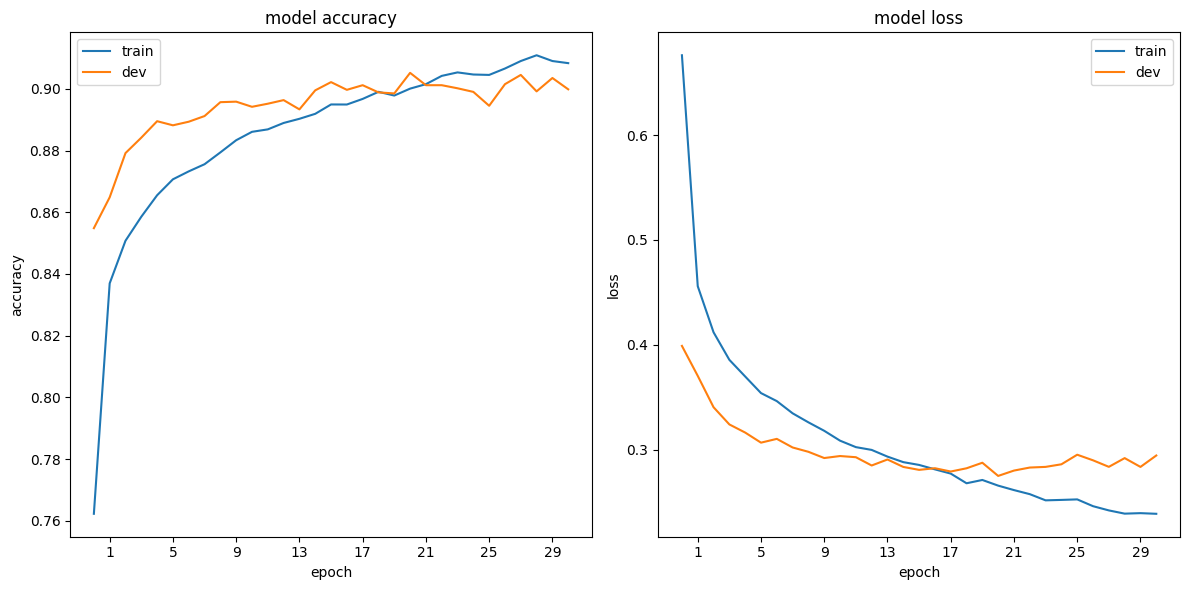

In [14]:
fashion_mlp.plot_curves()

### Evaluating the MLP on the training set (Classification Report)

In [15]:
train_classification_report_df, train_macro_average_df = fashion_mlp.classification_report(train_set)

1688/1688 [==============================] - 2s 1ms/step


In [16]:
train_classification_report_df

,Class Id,Class Name,Precision,Recall,F1,Precision-Recall AUC
0,0,T-shirt/top,0.864773,0.890556,0.877475,0.955345
1,1,Trouser,0.993880,0.992407,0.993143,0.999547
2,2,Pullover,0.853622,0.846667,0.850130,0.931279
3,3,Dress,0.913759,0.945741,0.929475,0.982476
4,4,Coat,0.829893,0.863704,0.846461,0.924240
5,5,Sandal,0.995891,0.987407,0.991631,0.999658
6,6,Shirt,0.808733,0.730556,0.767659,0.878761
7,7,Sneaker,0.959625,0.985926,0.972598,0.997385
8,8,Bag,0.990559,0.990926,0.990742,0.999428
9,9,Ankle boot,0.986981,0.968704,0.977757,0.998339


In [17]:
train_macro_average_df

,Macro Average Precision,Macro Average Recall,Macro Average F1,Macro Average Precision Recall AUC
0,0.919772,0.920259,0.919707,0.966646


### Evaluating the MLP on the validation set (Classification Report)

In [18]:
val_classification_report_df, val_macro_average_df = fashion_mlp.classification_report(validation_set)

188/188 [==============================] - 0s 1ms/step


In [19]:
val_classification_report_df

,Class Id,Class Name,Precision,Recall,F1,Precision-Recall AUC
0,0,T-shirt/top,0.857143,0.880000,0.868421,0.934453
1,1,Trouser,0.988314,0.986667,0.987490,0.997983
2,2,Pullover,0.841567,0.823333,0.832350,0.906273
3,3,Dress,0.897436,0.933333,0.915033,0.973582
4,4,Coat,0.812698,0.853333,0.832520,0.890253
5,5,Sandal,0.976431,0.966667,0.971524,0.995409
6,6,Shirt,0.792208,0.711667,0.749781,0.837558
7,7,Sneaker,0.944535,0.965000,0.954658,0.989549
8,8,Bag,0.968491,0.973333,0.970906,0.996648
9,9,Ankle boot,0.966387,0.958333,0.962343,0.993091


In [20]:
val_macro_average_df

,Macro Average Precision,Macro Average Recall,Macro Average F1,Macro Average Precision Recall AUC
0,0.904521,0.905167,0.904503,0.95148


### Evaluating the MLP on the test set (Classification Report)

In [21]:
test_classification_report_df, test_macro_average_df = fashion_mlp.classification_report(test_set)

313/313 [==============================] - 0s 1ms/step


In [22]:
test_classification_report_df

,Class Id,Class Name,Precision,Recall,F1,Precision-Recall AUC
0,0,T-shirt/top,0.836417,0.859,0.847558,0.923320
1,1,Trouser,0.984802,0.972,0.978359,0.996731
2,2,Pullover,0.800200,0.801,0.800600,0.881446
3,3,Dress,0.876819,0.904,0.890202,0.959460
4,4,Coat,0.786948,0.820,0.803134,0.879522
5,5,Sandal,0.978766,0.968,0.973353,0.996298
6,6,Shirt,0.734305,0.655,0.692389,0.797787
7,7,Sneaker,0.938343,0.974,0.955839,0.988991
8,8,Bag,0.964567,0.980,0.972222,0.993102
9,9,Ankle boot,0.971341,0.949,0.960040,0.992108


In [23]:
test_macro_average_df

,Macro Average Precision,Macro Average Recall,Macro Average F1,Macro Average Precision Recall AUC
0,0.887251,0.8882,0.88737,0.940876


## Remarks

On the test set, using the `Precision-Recall AUC` per class, it is evident that the most difficult class to predict is `Shirt`. `Coat` and `Pullover` can be considered as the next difficult classes if we consider a threshold of 0.9.